In [2]:
#Cau 1:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('income_spend.csv')

In [3]:
print(data)

     INCOME  SPEND
0       233    150
1       250    187
2       204    172
3       236    178
4       354    163
..      ...    ...
298     241    123
299     264    132
300     193    141
301     131    115
302     236    174

[303 rows x 2 columns]


In [4]:
'''def (M, O)
voi M = np.array()
for i in range M.shape[0]:
    M[i,:][...]
'''

'def (M, O)\nvoi M = np.array()\nfor i in range M.shape[0]:\n    M[i,:][...]\n'

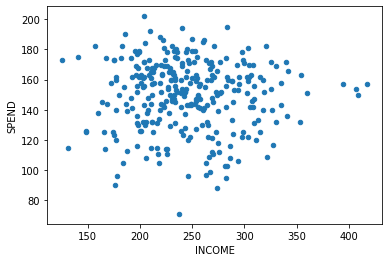

In [5]:
#Cau 3:
data.plot(kind = 'scatter', x = 'INCOME', y = 'SPEND')
plt.show()

In [6]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [7]:
data_transformed = pd.DataFrame(data_transformed, columns = ['INCOME', 'SPEND'])
data_transformed

,INCOME,SPEND
0,0.367698,0.603053
1,0.426117,0.885496
2,0.268041,0.770992
3,0.378007,0.816794
4,0.783505,0.702290
...,...,...
298,0.395189,0.396947
299,0.474227,0.465649
300,0.230241,0.534351
301,0.017182,0.335878


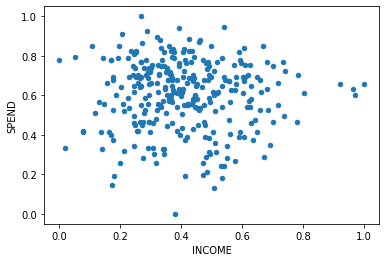

In [8]:
data_transformed.plot(kind = 'scatter', x = 'INCOME', y = 'SPEND')
plt.show()

In [9]:
Sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

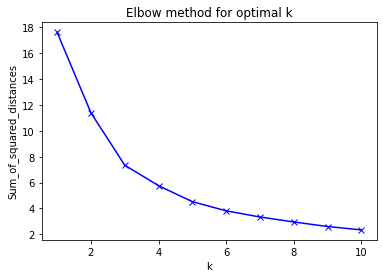

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

In [11]:
#data = pd.read_csv('income_spend.csv')

In [12]:
km4 = KMeans(n_clusters = 4)
km4 = km4.fit(data)

In [13]:
print(km4.labels_)

[0 0 2 0 1 2 1 0 2 2 0 3 0 2 1 0 1 3 0 0 0 0 0 3 2 1 2 2 1 2 2 2 0 3 2 2 1
 0 3 1 1 0 2 3 1 1 0 0 2 0 0 1 0 2 0 2 0 0 2 1 3 1 2 2 2 2 0 0 0 2 0 0 0 0
 2 0 0 0 2 0 0 1 1 1 3 0 3 2 2 3 0 2 0 1 2 3 1 0 1 0 0 3 2 0 2 2 3 0 0 0 1
 2 1 2 0 0 0 2 2 0 1 0 0 0 2 0 2 0 2 3 2 0 1 0 1 0 2 2 2 3 1 1 2 0 2 0 0 0
 0 2 0 2 0 3 0 2 0 2 2 0 0 1 2 2 2 3 3 0 0 2 3 0 1 0 2 2 0 1 2 3 1 3 1 0 3
 1 0 3 0 2 1 2 2 3 2 1 0 0 3 0 2 3 3 3 2 0 0 0 2 2 0 3 2 1 0 1 3 1 3 0 1 2
 0 3 3 2 3 2 1 1 0 3 1 3 1 1 1 1 1 1 3 0 2 3 2 0 1 3 0 0 3 0 3 1 3 1 3 2 0
 0 0 0 3 0 2 2 1 2 3 3 0 0 3 0 3 2 3 3 1 2 1 2 2 0 2 1 2 0 1 2 2 1 0 2 2 2
 2 2 3 3 2 2 0]


In [14]:
result = km4.labels_
result = pd.DataFrame(result, columns = ['cluster'])
result.groupby('cluster').size()

cluster
0    104
1     57
2     90
3     52
dtype: int64

In [15]:
centroids = km4.cluster_centers_
centroids = pd.DataFrame(centroids, columns = ['AVG_INCOME', 'AVG_SPEND'])
centroids

,AVG_INCOME,AVG_SPEND
0,242.048077,163.490385
1,318.614035,152.508772
2,192.522222,147.622222
3,262.634615,122.326923


KeyError: 'Centroid_INCOME'

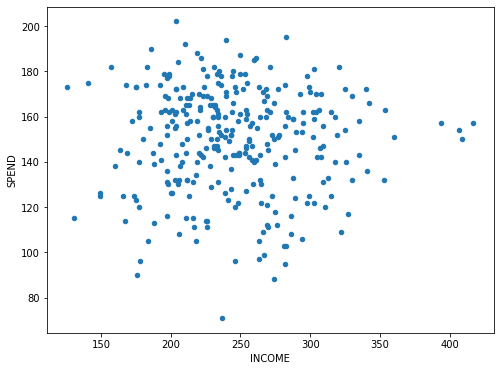

In [16]:
s1 = data.plot(figsize = [8, 6], kind = 'scatter', x = 'INCOME', y = 'SPEND')
centroids.plot(ax = s1, kind = 'scatter', x = 'Centroid_INCOME', y = 'Centroid_SPEND', color = 'red', 
               fontsize = 14, maker = 'x', s = [70, 70, 70])
plt.show()